# RandomForestRegression model true Pipeline

Scikit-Learn provides two great base classes, TransformerMixin and BaseEstimator.
They use, inharitance concept of class object and we will use it in PipeLine

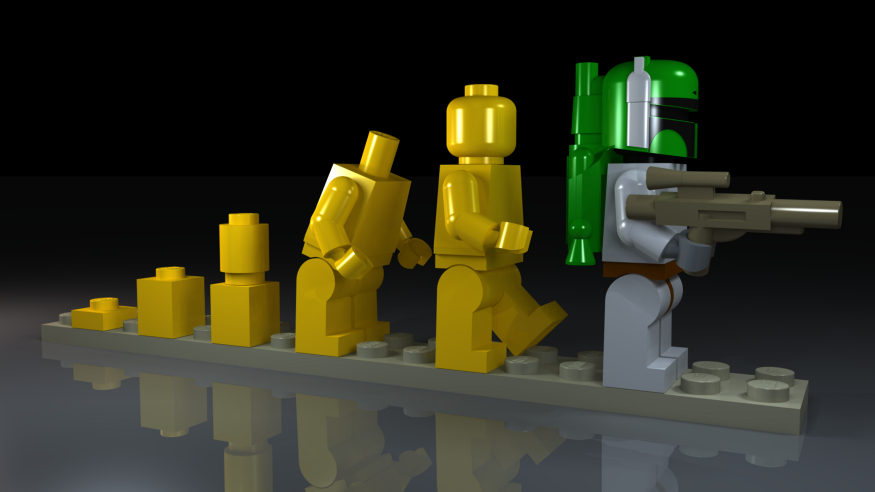

In [1]:
from IPython.display import Image
Image("Pipe.png")

Photo represents concept of heritance,that will be used in pipeline 

In [15]:
#Import all needed libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
#First we have to import base classes BaseEstimator, TransformerMixin
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline 
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [17]:
df1 = pd.read_csv('day.csv')



In [5]:
#drop features with high corelation
df1.drop(['dteday','casual','registered','atemp'],axis=1,inplace=True)

In [6]:
df1

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,3,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,4,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,5,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,728,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,729,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,730,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [7]:
class FeatureSelector( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self, feature_names ):
        self._feature_names = feature_names 
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform( self, X, y = None ):
        return X[ self._feature_names ] 

In [18]:
#Categrical features to pass down the categorical pipeline 
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']

#Numerical features to pass down the numerical pipeline 
numerical_features = ['temp','hum','windspeed']

#Defining the steps in the categorical pipeline 
categorical_pipeline = Pipeline( steps = [ ( 'cat_selector', FeatureSelector(categorical_features) ),
                                          ( 'one_hot_encoder', OneHotEncoder() ) ] )
    
#Defining the steps in the numerical pipeline     
numerical_pipeline = Pipeline( steps = [ ( 'num_selector', FeatureSelector(numerical_features) ),
                                      ( 'std_norm', MinMaxScaler() ) ] )

#Combining numerical and categorical piepline into one full big pipeline horizontally 
#we need a way to combine them, horizontally,it can be done by using FeatureUnion
full_pipeline = FeatureUnion( transformer_list = [ ( 'categorical_pipeline', categorical_pipeline ), 
                                                  
                                                  ( 'numerical_pipeline', numerical_pipeline ) ] )

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#Leave it as a dataframe becuase our pipeline is called on a pandas dataframe to extract the appropriate columns
X = df1.drop('cnt', axis = 1)

#We can covert the target variable to numpy 
y = df1['cnt'].values 

X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2 , random_state = 42 )

#The full pipeline as a step in another pipeline with an estimator as the final step
full_pipeline_m = Pipeline( steps = [ ( 'full_pipeline', full_pipeline),( 'model', RandomForestRegressor() ) ] )

#Can call fit on it just like any other pipeline
full_pipeline_m.fit( X_train, y_train )

#Can predict with it like any other pipeline
y_pred = full_pipeline_m.predict( X_test ) 

In [10]:
#Import metrics mean_squere_error,mean_absolute_error,r2_score

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [14]:
MSE = mean_squared_error(y_test, y_pred)

RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MAE=mean_absolute_error(y_test,y_pred)

r2=r2_score(y_test,y_pred)

df_errors=pd.DataFrame({'MSE':[MSE],'MAE':[MAE],'R2':[r2],'model':["RandomForestReg"]})
df_errors.set_index("model")

,MSE,MAE,R2
model,,,
RandomForestReg,460289.358169,445.258571,0.885211


# Conclusion of using PipeLine

In [19]:
# Pipeline is very elgant method for dataprepocesing and applying model.Hance,it gives good reslut's it should be used always when it's possible